# Shallow Water Equations

In [13]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Newtonian, 2d, single layer

In [293]:
# define grids
nx = 2000
nt = 1000
xmin = 0.
xmax = 10.

x = np.linspace(xmin, xmax, num=nx-2, endpoint=False)
hu = np.zeros((nx, nt+1))
h = np.zeros((nx, nt+1))
# going to do sine wave so can use periodic boundary conditions
h[1:-1,0] = 1 + 0.4 * np.exp(-(x-5)**2*2) #0.01 * np.sin(0.25 * np.pi + 2. * np.pi * x / (xmax - xmin)) + 1.
h[0,0] = h[-2,0]
h[-1,0] = h[1,0]

#hu[:,0] = 0.1 * h[:,0]

dx = x[1] - x[0]
dt = 0.5 * dx

# set gravity
g = 1.0

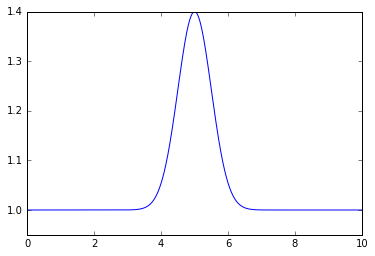

In [274]:
plt.plot(x,h[1:-1,0])
plt.show()

In [291]:
# evolution 
def evolve(n):
    
    # Jacobean
    J = np.zeros((nx-2, 2, 2))
    J[:,0,1] = 1.
    J[:,1,0] = -(hu[1:-1,n]/h[1:-1,n])**2 + g * h[1:-1,n]
    J[:,1,1] =  2 * hu[1:-1,n] / h[1:-1,n]
    
    J2 = np.array([np.dot(J[i,:,:], J[i,:,:]) for i in range(nx-2)])
    
    h[1:-1,n+1] = h[1:-1,n] - 0.5 * dt/dx * (J[:,0,0] * (h[2:,n] - h[:-2,n]) + J[:,0,1] * (hu[2:,n] - hu[:-2,n])) +\
                  0.5 * (dt/dx)**2 * (J2[:,0,0] * (h[:-2,n] - 2 * h[1:-1,n] + h[2:,n]) + \
                                      J2[:,0,1] * (hu[:-2,n] - 2 * hu[1:-1,n] + hu[2:,n]))
    hu[1:-1,n+1] = hu[1:-1,n] - 0.5 * dt/dx * (J[:,1,0] * (h[2:,n] - h[:-2,n]) + J[:,1,1] * (hu[2:,n] - hu[:-2,n]))+ \
                  0.5 * (dt/dx)**2 * (J2[:,1,0] * (h[:-2,n] - 2 * h[1:-1,n] + h[2:,n]) + \
                                      J2[:,1,1] * (hu[:-2,n] - 2 * hu[1:-1,n] + hu[2:,n]))
    
    
    #def h_flux(_h, _hu):
     #   return _hu
    
    #def hu_flux(_h, _hu):
     #   return _hu**2 / _h + 0.5 * g * _h**2
    
    #h_r = 0.5 * (h_flux(h[2:,n], hu[2:,n]) + h_flux(h[1:-1,n], hu[1:-1,n]) - (dx/dt) * (h[2:,n] - h[1:-1,n]))
    #hu_r = 0.5 * (hu_flux(h[2:,n], hu[2:,n]) + hu_flux(h[1:-1,n], hu[1:-1,n]) - (dx/dt) * (hu[2:,n] - hu[1:-1,n]))
    
    #h_l = 0.5 * (h_flux(h[1:-1,n], hu[1:-1,n]) + h_flux(h[:-2,n], hu[:-2,n]) - (dx/dt) * (h[1:-1,n] - h[:-2,n]))
    #hu_l = 0.5 * (hu_flux(h[1:-1,n], hu[1:-1,n]) + hu_flux(h[:-2,n], hu[:-2,n]) - (dx/dt) * (hu[1:-1,n] - hu[:-2,n]))
    
    #h[1:-1,n+1] = h[1:-1,n] - dt / dx * (h_r - h_l)
    #hu[1:-1,n+1] = hu[1:-1,n] - dt / dx * (hu_r - hu_l)
    
    # do boundaries - periodic
    h[0,n+1] = h[-2,n+1]
    h[-1,n+1] = h[1,n+1]
    hu[0,n+1] = hu[-2,n+1]
    hu[-1,n+1] = hu[1,n+1]

In [294]:
for i in range(nt):
    evolve(i)

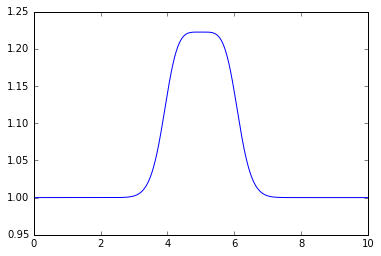

In [296]:
plt.plot(x,h[1:-1,200])
plt.show()

In [260]:
print(nt * dt)

100.401606426


In [261]:
2 / dt

199.19999999999999